<a href="https://colab.research.google.com/github/podo47/ML-Classification/blob/main/ML__hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
from collections import Counter
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import data

In [3]:
data="/content/drive/MyDrive/ML_hw4/train.csv"
train_df = pd.read_csv(data)
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


# Exploratory data analysis

In [4]:
# Printing the shape of the train dataset
print(train_df.shape)

(58592, 44)


In [5]:
# View summary of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [6]:
# Check for missing values:
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

**Explore categorical variables**

In [7]:
categorical = train_df.select_dtypes(include =[object])
print("There are {} categorical variables".format(categorical.shape[1]))
print('The categorical variables are :\n',categorical.columns)

There are 28 categorical variables
The categorical variables are :
 Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


**Explore numerical variables**

In [8]:
numerical = train_df.select_dtypes(include =[np.float64,np.int64])
print("There are {} numerical variables".format(numerical.shape[1]))
print('The numerical variables are :\n',numerical.columns)

There are 16 numerical variables
The numerical variables are :
 Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


**Check if data is imbalanced**

0    54844
1     3748
Name: is_claim, dtype: int64


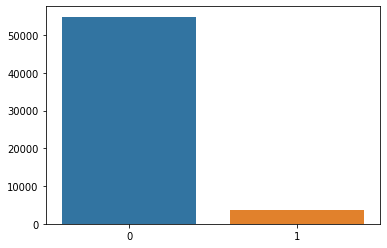

In [9]:
print(train_df.is_claim.value_counts())
sns.barplot(x = [0, 1], y = [54844, 3784])

# Data preprocessing

**Drop useless features**

In [10]:
train = train_df.copy()
train.drop(['policy_id'], axis=1, inplace=True)

**Label Encoding**

In [11]:
# Ordinal variables
train['transmission_type'] = train['transmission_type'].map({'Manual': 0, 'Automatic': 1})
train['steering_type'] = train['steering_type'].map({'Manual': 0, 'Power': 1, 'Electric': 2})

train[['max_torque_Nm','max_torque_rpm']] = train["max_torque"].apply(lambda n: pd.Series(str(n).split("@")))
train.drop(["max_torque"], axis=1, inplace= True)
train['max_torque_Nm'] = train['max_torque_Nm'].str[:-2].astype(float)
train['max_torque_rpm'] = train['max_torque_rpm'].str[:-3].astype(int)

train[['max_power_bhp','max_power_rpm']] = train["max_power"].apply(lambda n: pd.Series(str(n).split("@")))
train.drop(["max_power"], axis=1, inplace= True)
train['max_power_rpm'] = train['max_power_rpm'].str[:-3].astype(int)
train['max_power_bhp'] = train['max_power_bhp'].str[:-3].astype(float)

**One-hot Encoding**

In [12]:
train = pd.get_dummies(train, drop_first=True)

In [13]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,transmission_type,gear_box,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990,1,2,796,3,0,5,...,0,0,0,0,0,1,0,0,0,1
1,0.672619,0.02,0.375000,27003,1,2,796,3,0,5,...,0,0,0,0,0,1,0,0,0,1
2,0.841110,0.02,0.384615,4076,1,2,796,3,0,5,...,0,0,0,0,0,1,0,0,0,1
3,0.900277,0.11,0.432692,21622,1,2,1197,4,1,5,...,0,1,1,1,1,1,1,1,1,1
4,0.596403,0.11,0.634615,34738,2,2,999,3,1,5,...,0,0,0,1,1,1,0,1,1,1


**Train test split**

In [14]:
# Shuffle dataset 
shuffle_train = train.sample(frac=1,random_state=1).reset_index(drop=True)

# Define size for train set 
train_size = int(0.7 * len(train))

# Split dataset 
train_set = shuffle_train[:train_size]
test_set = shuffle_train[train_size:]

In [15]:
train_set.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,transmission_type,gear_box,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.429286,0.06,0.365385,6112,1,2,1197,4,0,5,...,0,0,1,1,1,1,1,1,1,1
1,1.208874,0.10,0.423077,4076,2,2,999,3,1,5,...,0,0,0,1,1,1,0,1,1,1
2,0.518087,0.11,0.298077,34738,1,2,1197,4,0,5,...,0,0,1,1,1,1,1,1,1,1
3,0.700774,0.14,0.442308,7788,1,2,998,3,0,5,...,0,0,0,1,1,1,0,0,1,1
4,0.893027,0.07,0.461538,8794,3,6,1493,4,1,6,...,1,1,1,1,1,1,1,0,1,1


In [16]:
train_set.shape,test_set.shape

((41014, 88), (17578, 88))

**Declare feature vector and target variable**

In [17]:
X = train_set.drop(['is_claim'], axis=1)
y = train_set['is_claim']
X_test_init = test_set.copy()
X_test = X_test_init.drop(['is_claim'], axis=1)
y_test = X_test_init['is_claim']

**Use SMOTE to handle imbalanced data**

In [18]:
from imblearn.over_sampling import SMOTE

Original training dataset shape :
0    38411
1     2603
Name: is_claim, dtype: int64
Resampled training dataset shape :
0    38411
1    30728
Name: is_claim, dtype: int64


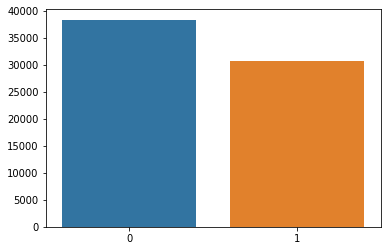

In [19]:
balance = SMOTE(random_state=7, sampling_strategy=0.8)
X_train, y_train = balance.fit_resample(X,y)
print('Original training dataset shape :\n{}'.format(y.value_counts()))
print('Resampled training dataset shape :\n{}'.format(y_train.value_counts()))
sns.barplot(x = [0, 1], y = [38411, 30728])

# Naïve Bayer classifier

**Model training**

In [20]:
import math
class Gaussian_Bayes():
  def __init__(self):
    pass
  # Build the model
  def fit(self,X_train,y_train):
    self.training_data = X_train.copy()
    self.gb_y_train = pd.DataFrame(y_train.values, columns = ['claim'])
    self.training_data['claim'] = y_train.values
    self.find_mean = self.training_data.groupby("claim").mean() # Mean for gaussian
    self.find_var = self.training_data.groupby("claim").var() # Variance for gaussian
    self.prior_prob = self.Prior()
    return self
  
  # Prior probability
  def Prior(self):
    label = self.gb_y_train['claim'].value_counts().sort_index()
    pri = []
    for c in label :
      pri.append(c/sum(label))
    prior_prob = np.array(pri)
    return prior_prob
    
  # Calculate with gaussian distribution
  def Distribution(self,mu,variance,feature):
    norm = 1/np.sqrt(2*math.pi*variance)*np.exp(-(feature-mu)**2/(2*variance)) # Normal distribution
    norm = pd.DataFrame(norm).prod(axis=1) # P(x1,x2,...,xn|yi)
    return norm

  # Prediction
  def Predict(self,X_test):
    final_prob = []
    for feature in X_test.values :
      prob=self.Distribution(self.find_mean,self.find_var,feature)*self.prior_prob
      final_prob.append(prob)
    result=np.argmax(final_prob, axis=1)  # argmax for prediction
    return result

In [51]:
nb = Gaussian_Bayes()

In [52]:
nb.fit(X_train,y_train)
# Test set prediction
y_test_nb = nb.Predict(X_test)
# Train set prediction
y_train_nb = nb.Predict(X_train)

**Check accuracy score**

In [44]:
from sklearn.metrics import accuracy_score

In [143]:
# Train set accuracy
train_accuracy_nb = accuracy_score(y_train,y_train_nb)
# Test set accuracy
test_accuracy_nb = accuracy_score(y_test,y_test_nb)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_nb))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_nb))

Test set accuracy : 0.2218
Train set accuracy : 0.4895


In [49]:
#Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

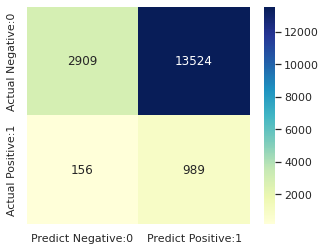

In [195]:
cm_nb = confusion_matrix(y_test, y_test_nb)
# Visualize confusion matrix 
sns.set(rc = {'figure.figsize':(5,4)})
confusion_matrix_nb = pd.DataFrame(data=cm_nb, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='YlGnBu')

# Random Forest Classifier

**Entropy and information_gain**

In [31]:
class Node:
    def __init__(self,predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self,max_depth=None,max_features=None,random_state=None):
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.tree = None
    
    def fit(self, X, y):
        # store number of classes and features of the dataset into model object
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.values
        if isinstance(y, pd.core.series.Series):
            y = y.values

        self.n_classes = len(set(y))
        self.n_features = X.shape[1]
        if self.max_features==None:
            self.max_features = self.n_features

        if isinstance(self.max_features,float) and self.max_features<=1:
            self.max_features = int(self.max_features*self.n_features)

        # create tree for the dataset
        self.tree = self.grow_tree(X,y,self.random_state)

    def grow_tree(self, X, y, random_state, depth=0):
    
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(num_samples_per_class)

        node = Node(predicted_class=predicted_class)

        if (self.max_depth is None) or (depth < self.max_depth):
            id, thr = self.best_split(X, y, random_state)

            if id is not None:
                if random_state is not None:
                    random_state += 1

                indices_left = X[:, id] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                
                node.feature_index = id
                node.threshold = thr
                node.left = self.grow_tree(X_left, y_left, random_state, depth + 1)
                node.right = self.grow_tree(X_right, y_right, random_state, depth + 1)

        return node  
      
    def best_split(self, X, y, random_state):

        m = len(y)
        if m <= 1:
            return None, None

        num_class_parent = [np.sum(y==c) for c in range(self.n_classes)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_class_parent)
        if best_gini == 0:
            return None, None

        best_feat_id, best_threshold = None, None

        random.seed(random_state)
        feat_indices = random.sample(range(self.n_features),self.max_features)

        for feat_id in feat_indices:

            sorted_column = sorted(set(X[:,feat_id]))
            threshold_values = [np.mean([a,b]) for a,b in zip(sorted_column,sorted_column[1:])]

            for threshold in threshold_values:

                left_y = y[X[:,feat_id]<threshold]
                right_y = y[X[:,feat_id]>threshold]

                num_class_left = [np.sum(left_y==c) for c in range(self.n_classes)]
                num_class_right = [np.sum(right_y==c) for c in range(self.n_classes)]

                gini_left = 1.0 - sum((n / len(left_y)) ** 2 for n in num_class_left)
                gini_right = 1.0 - sum((n / len(right_y)) ** 2 for n in num_class_right)

                gini = (len(left_y)/m)*gini_left + (len(right_y)/m)*gini_right

                if gini < best_gini:
                    best_gini = gini
                    best_feat_id = feat_id
                    best_threshold = threshold

        return best_feat_id, best_threshold

    def predict(self,X):
    
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.values

        predicted_classes = np.array([self.predict_example(inputs) for inputs in X])

        return predicted_classes

    def predict_example(self, inputs):

        node = self.tree

        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right

        return node.predicted_class 

In [37]:
from scipy import stats
import random

class RandomForest:
    def __init__(self, num_trees=5, subsample_size=None, max_depth=5, max_features=5, bootstrap=True, random_state=None):
        self.num_trees = num_trees
        self.subsample_size = subsample_size
        self.max_depth = max_depth
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.random_state = random_state
        # Will store individually trained decision trees
        self.decision_trees = []
    def fit(self, X, y):
        # Reset
        if len(self.decision_trees) > 0:
            self.decision_trees = []

        if isinstance(X, pd.core.frame.DataFrame):
            X = X.values
        if isinstance(y, pd.core.series.Series):
            y = y.values
            
        # Build each tree of the forest
        num_built = 0

        while num_built < self.num_trees:

            clf = DecisionTree(
                max_depth=self.max_depth,
                max_features=self.max_features,
                random_state=self.random_state
            )

            # Obtain data sample
            _X, _y = self.sample(X, y, self.random_state)
            # Train
            clf.fit(_X, _y)
            # Save the classifier
            self.decision_trees.append(clf)
            
            num_built += 1

            if self.random_state is not None:
                self.random_state += 1

    def sample(self, X, y, random_state):

        n_rows, n_cols = X.shape

        # Sample with replacement
        if self.subsample_size is None:
            sample_size = n_rows
        else:
            sample_size = int(n_rows*self.subsample_size)

        np.random.seed(random_state)
        samples = np.random.choice(a=n_rows, size=sample_size, replace=self.bootstrap)

        return X[samples], y[samples]
    
    def predict(self, X):
        # Make predictions with every tree in the forest
        y = []
        for tree in self.decision_trees:
            y.append(tree.predict(X))
        
        # Reshape so we can find the most common value
        y = np.swapaxes(y, axis1=0, axis2=1)
        
        # Use majority voting for the final prediction
        predicted_classes = stats.mode(y,axis=1)[0].reshape(-1)

        return predicted_classes

    

In [39]:
rfc_s = RandomForest()
rfc_s.fit(X_train,y_train)
# Test set prediction
y_test_rfc_s = rfc_s.predict(X_test)
# Train set prediction
y_train_rfc_s = rfc_s.predict(X_train)

In [45]:
# Train set accuracy
train_accuracy_rfc_s = accuracy_score(y_train,y_train_rfc_s)
# Test set accuracy
test_accuracy_rfc_s = accuracy_score(y_test,y_test_rfc_s)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_rfc_s))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_rfc_s))

Test set accuracy : 0.9259
Train set accuracy : 0.5619


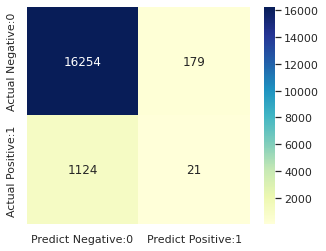

In [196]:
# Visualize confusion matrix 
cm_rfc_s = confusion_matrix(y_test, y_test_rfc_s)
sns.set(rc = {'figure.figsize':(5,4)})
confusion_matrix_rfc_s = pd.DataFrame(data=cm_rfc_s, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(confusion_matrix_rfc_s, annot=True, fmt='d', cmap='YlGnBu')

# Random Forest Classifier (sklearn)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=100,
              criterion='gini',max_depth=10,max_features='log2',
              min_samples_leaf=3,min_samples_split=10,random_state=17)                      

In [57]:
# Model training
rfc.fit(X_train,y_train)
# Test set prediction
y_test_rfc = rfc.predict(X_test)
# Train set prediction
y_train_rfc = rfc.predict(X_train)

In [58]:
# Train set accuracy
train_accuracy_rfc = accuracy_score(y_train,y_train_rfc)
# Test set accuracy
test_accuracy_rfc = accuracy_score(y_test,y_test_rfc)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_rfc))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_rfc))

Test set accuracy : 0.7858
Train set accuracy : 0.6963


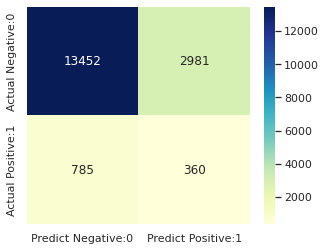

In [197]:
# Visualize confusion matrix 
cm_rfc = confusion_matrix(y_test, y_test_rfc)
confusion_matrix_rfc = pd.DataFrame(data=cm_rfc, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(confusion_matrix_rfc, annot=True, fmt='d', cmap='YlGnBu')

# XGBoost

In [60]:
from xgboost import XGBClassifier

In [61]:
xgb = XGBClassifier(n_estimators=100, learning_rate= 0.4)
# Model training
xgb.fit(X_train, y_train)
# Test set prediction
y_test_xgb = xgb.predict(X_test)
# Train set prediction
y_train_xgb = xgb.predict(X_train)

In [62]:
# Train set accuracy
train_accuracy_xgb = accuracy_score(y_train,y_train_xgb)
# Test set accuracy
test_accuracy_xgb = accuracy_score(y_test,y_test_xgb)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_xgb))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_xgb))

Test set accuracy : 0.9225
Train set accuracy : 0.9353


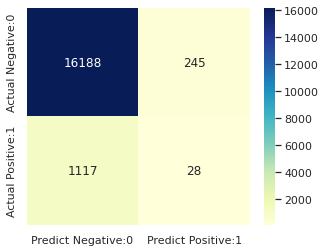

In [198]:
# Visualize confusion matrix 
cm_xgb = confusion_matrix(y_test, y_test_xgb)
confusion_matrix_xgb = pd.DataFrame(data=cm_xgb, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='YlGnBu')

# Catboost

In [64]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [65]:
cbc = CatBoostClassifier(iterations=100,learning_rate=0.4,verbose=0 )                  
# Model training
cbc.fit(X_train,y_train)
# Test set prediction
y_test_cbc = cbc.predict(X_test)
# Train set prediction
y_train_cbc = cbc.predict(X_train)

In [66]:
# Train set accuracy
train_accuracy_cbc = accuracy_score(y_train,y_train_cbc)
# Test set accuracy
test_accuracy_cbc = accuracy_score(y_test,y_test_cbc)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_cbc))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_cbc))

Test set accuracy : 0.9331
Train set accuracy : 0.9587


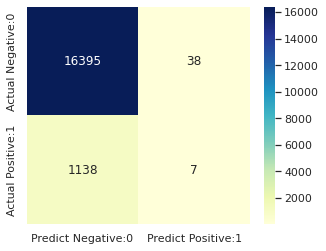

In [199]:
# Visualize confusion matrix 
cm_cbc = confusion_matrix(y_test, y_test_cbc)
confusion_matrix_cbc = pd.DataFrame(data=cm_cbc, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(confusion_matrix_cbc, annot=True, fmt='d', cmap='YlGnBu')

# LightGBM

In [68]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [69]:
lgbm = lgb.LGBMClassifier(n_estimators = 100,learning_rate = 0.4)
# Model training
lgbm.fit(X_train, y_train)
# Test set prediction
y_test_lgbm = lgbm.predict(X_test)
# Train set prediction
y_train_lgbm = lgbm.predict(X_train)

In [70]:
# Train set accuracy
train_accuracy_lgbm = accuracy_score(y_train,y_train_lgbm)
# Test set accuracy
test_accuracy_lgbm = accuracy_score(y_test,y_test_lgbm)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_lgbm))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_lgbm))

Test set accuracy : 0.9316
Train set accuracy : 0.9624


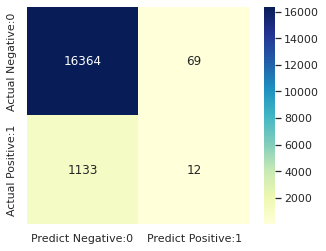

In [200]:
# Visualize confusion matrix 
cm_lgbm = confusion_matrix(y_test, y_test_lgbm)
confusion_matrix_lgbm = pd.DataFrame(data=cm_lgbm, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(confusion_matrix_lgbm, annot=True, fmt='d', cmap='YlGnBu')

# K-Fold Cross-Validation

In [72]:
from sklearn.model_selection import cross_validate

In [73]:
X_cv = train.drop(['is_claim'], axis=1)
y_cv = train['is_claim']

Resampled dataset shape :
0    54844
1    43875
Name: is_claim, dtype: int64


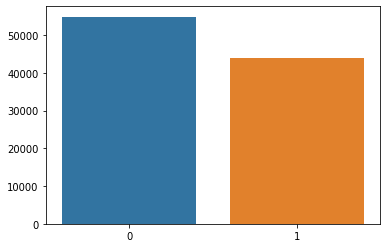

In [74]:
balance_cv = SMOTE(random_state=7, sampling_strategy=0.8)
X_cvb, y_cvb = balance_cv.fit_resample(X_cv,y_cv)
print('Resampled dataset shape :\n{}'.format(y_cvb.value_counts()))
sns.barplot(x = [0, 1], y = [54844, 43875])

In [203]:
def cross_validation(model, cv_X, cv_y, cv_value):

      score = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator = model,X = cv_X, y = cv_y, cv = cv_value,
                               scoring = score, return_train_score = True)
      print("{} Fold Mean Training Accuracy : ".format(cv_value),results['train_accuracy'].mean()) 
      print("{} Fold Mean Training Precision : ".format(cv_value),results['train_precision'].mean())
      print("{} Fold Mean Training Recall : ".format(cv_value),results['train_recall'].mean())
      print("{} Fold Mean Training F1 : ".format(cv_value),results['train_f1'].mean())
      return [results['train_accuracy'].mean()*100 ,results['train_accuracy'].mean(), results['train_recall'].mean(),results['train_f1'].mean()]     
    

**Random forest classifier (sklearn)**

In [204]:
rfc_result_3 = cross_validation(rfc, X_cvb, y_cvb, 3)
rfc_result_5 = cross_validation(rfc, X_cvb, y_cvb, 5)
rfc_result_10 = cross_validation(rfc, X_cvb, y_cvb, 10)

3 Fold Mean Training Accuracy :  0.7022762031233022
3 Fold Mean Training Precision :  0.6896596183657859
3 Fold Mean Training Recall :  0.6007635327635328
3 Fold Mean Training F1 :  0.6420861640999614
5 Fold Mean Training Accuracy :  0.7020052088704394
5 Fold Mean Training Precision :  0.6942563692444561
5 Fold Mean Training Recall :  0.589014245014245
5 Fold Mean Training F1 :  0.6371560771609736
10 Fold Mean Training Accuracy :  0.7008478637094401
10 Fold Mean Training Precision :  0.7033281726489022
10 Fold Mean Training Recall :  0.5657942723153372
10 Fold Mean Training F1 :  0.6269080839536136


**XGBoost**

In [205]:
xgb_result_3 = cross_validation(xgb, X_cvb, y_cvb, 3)
xgb_result_5 = cross_validation(xgb, X_cvb, y_cvb, 5)
xgb_result_10 = cross_validation(xgb, X_cvb, y_cvb, 10)

3 Fold Mean Training Accuracy :  0.9283067700503378
3 Fold Mean Training Precision :  0.9762211139677243
3 Fold Mean Training Recall :  0.8593504273504274
3 Fold Mean Training F1 :  0.9135865473109132
5 Fold Mean Training Accuracy :  0.9290840973065558
5 Fold Mean Training Precision :  0.978083980646885
5 Fold Mean Training Recall :  0.8595954415954417
5 Fold Mean Training F1 :  0.914700445355977
10 Fold Mean Training Accuracy :  0.9277286558015545
10 Fold Mean Training Precision :  0.9764755940948555
10 Fold Mean Training Recall :  0.8580410381482257
10 Fold Mean Training F1 :  0.9132924734347861


**CatBoost**

In [206]:
cbc_result_3 = cross_validation(cbc, X_cvb, y_cvb, 3)
cbc_result_5 = cross_validation(cbc, X_cvb, y_cvb, 5)
cbc_result_10 = cross_validation(cbc, X_cvb, y_cvb, 10)

3 Fold Mean Training Accuracy :  0.9568473976503061
3 Fold Mean Training Precision :  0.9982050339287488
3 Fold Mean Training Recall :  0.9044786324786326
3 Fold Mean Training F1 :  0.9481314441980487
5 Fold Mean Training Accuracy :  0.9570067784706607
5 Fold Mean Training Precision :  0.9982644347292993
5 Fold Mean Training Recall :  0.9048091168091169
5 Fold Mean Training F1 :  0.9487853060595116
10 Fold Mean Training Accuracy :  0.9568472177106248
10 Fold Mean Training Precision :  0.9988446635331825
10 Fold Mean Training Recall :  0.9039441715456565
10 Fold Mean Training F1 :  0.9488227351681205


**LightGBM**

In [207]:
lgbm_result_3 = cross_validation(lgbm, X_cvb, y_cvb, 3)
lgbm_result_5 = cross_validation(lgbm, X_cvb, y_cvb, 5)
lgbm_result_10 = cross_validation(lgbm, X_cvb, y_cvb, 10)

3 Fold Mean Training Accuracy :  0.9604637203126384
3 Fold Mean Training Precision :  0.9975440450139109
3 Fold Mean Training Recall :  0.9132193732193731
3 Fold Mean Training F1 :  0.952675241679669
5 Fold Mean Training Accuracy :  0.9593822084440895
5 Fold Mean Training Precision :  0.9980412900096998
5 Fold Mean Training Recall :  0.9103760683760683
5 Fold Mean Training F1 :  0.9517472522736592
10 Fold Mean Training Accuracy :  0.9591162844125831
10 Fold Mean Training Precision :  0.998157182779295
10 Fold Mean Training Recall :  0.9096826971658072
10 Fold Mean Training F1 :  0.951668216526827


**Naive Bayer**

In [210]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [211]:
def NB_Kfold(k):
  kf_nb = KFold(n_splits=k)
  acc_score = []
  pre_score = []
  rec_score = []
  f_score = []
  for train_index, test_index in kf_nb.split(X_cvb):
    X_train_nb_kv, X_test_nb_kv = X_cvb.iloc[train_index,:], X_cvb.iloc[test_index,:]
    y_train_nb_kv, y_test_nb_kv = y_cvb[train_index], y_cvb[test_index]

    nb.fit(X_train_nb_kv,y_train_nb_kv)
    nb_kv_pred = nb.Predict(X_test_nb_kv)

    acc_kv = accuracy_score(y_test_nb_kv,nb_kv_pred)
    acc_score.append(acc_kv)
    pre_kv = precision_score(y_test_nb_kv,nb_kv_pred)
    pre_score.append(pre_kv)
    rec_kv = recall_score(y_test_nb_kv,nb_kv_pred)
    rec_score.append(rec_kv)
    f_kv = f1_score(y_test_nb_kv,nb_kv_pred)
    f_score.append(f_kv)

  avg_acc_score = sum(acc_score)/k*100
  avg_pre_score = sum(pre_score)/k
  avg_rec_score = sum(rec_score)/k
  avg_f_score = sum(f_score)/k
  print("{} Fold Mean Training Accuracy : ".format(k),avg_acc_score)
  print("{} Fold Mean Training Precision : ".format(k),avg_pre_score)
  print("{} Fold Mean Training Recall : ".format(k),avg_rec_score)
  print("{} Fold Mean Training F1 : ".format(k),avg_f_score)
  return [avg_acc_score,avg_pre_score,avg_rec_score,avg_f_score]

In [212]:
nb_kv3 = NB_Kfold(3)
nb_kv5 = NB_Kfold(5)
nb_kv10 = NB_Kfold(10)

3 Fold Mean Training Accuracy :  41.37521852281355
3 Fold Mean Training Precision :  0.44900190141393503
3 Fold Mean Training Recall :  0.7935150595116781
3 Fold Mean Training F1 :  0.4458192202612983
5 Fold Mean Training Accuracy :  46.209278183326745
5 Fold Mean Training Precision :  0.4468173159932075
5 Fold Mean Training Recall :  0.8272627250498559
5 Fold Mean Training F1 :  0.43856907622490066
10 Fold Mean Training Accuracy :  48.136976211113634
10 Fold Mean Training Precision :  0.44702538611135567
10 Fold Mean Training Recall :  0.8266935881939157
10 Fold Mean Training F1 :  0.4443653117866836


**Random Forest Classifier**

In [213]:
def rfc_Kfold(k):
  kf_rfc = KFold(n_splits=k)
  acc_score = []
  pre_score = []
  rec_score = []
  f_score = []
  for train_index, test_index in kf_rfc.split(X_cvb):
    X_train_rfc_kv, X_test_rfc_kv = X_cvb.iloc[train_index,:], X_cvb.iloc[test_index,:]
    y_train_rfc_kv, y_test_rfc_kv = y_cvb[train_index], y_cvb[test_index]

    rfc_s.fit(X_train_rfc_kv,y_train_rfc_kv)
    rfc_kv_pred = rfc_s.predict(X_test_rfc_kv)

    acc_kv = accuracy_score(y_test_rfc_kv,rfc_kv_pred)
    acc_score.append(acc_kv)
    pre_kv = precision_score(y_test_rfc_kv,rfc_kv_pred)
    pre_score.append(pre_kv)
    rec_kv = recall_score(y_test_rfc_kv,rfc_kv_pred)
    rec_score.append(rec_kv)
    f_kv = f1_score(y_test_rfc_kv,rfc_kv_pred)
    f_score.append(f_kv)

  avg_acc_score = sum(acc_score)/k*100
  avg_pre_score = sum(pre_score)/k
  avg_rec_score = sum(rec_score)/k
  avg_f_score = sum(f_score)/k
  print("{} Fold Mean Training Accuracy : ".format(k),avg_acc_score)
  print("{} Fold Mean Training Precision : ".format(k),avg_pre_score)
  print("{} Fold Mean Training Recall : ".format(k),avg_rec_score)
  print("{} Fold Mean Training F1 : ".format(k),avg_f_score)
  return [avg_acc_score,avg_pre_score,avg_rec_score,avg_f_score]

In [214]:
rfc_s_kv3 = rfc_Kfold(3)
rfc_s_kv5 = rfc_Kfold(5)
rfc_s_kv10 = rfc_Kfold(10)

3 Fold Mean Training Accuracy :  14.900936161372428
3 Fold Mean Training Precision :  0.1179145343958939
3 Fold Mean Training Recall :  0.6451631816483627
3 Fold Mean Training F1 :  0.1886146918925993
5 Fold Mean Training Accuracy :  9.225081037277146
5 Fold Mean Training Precision :  0.24621941864505134
5 Fold Mean Training Recall :  0.5688948718905312
5 Fold Mean Training F1 :  0.08543940292945622
10 Fold Mean Training Accuracy :  30.58144410545962
10 Fold Mean Training Precision :  0.4521512943473412
10 Fold Mean Training Recall :  0.35255067225097314
10 Fold Mean Training F1 :  0.0917785227222628


**Conclusion - kfold**

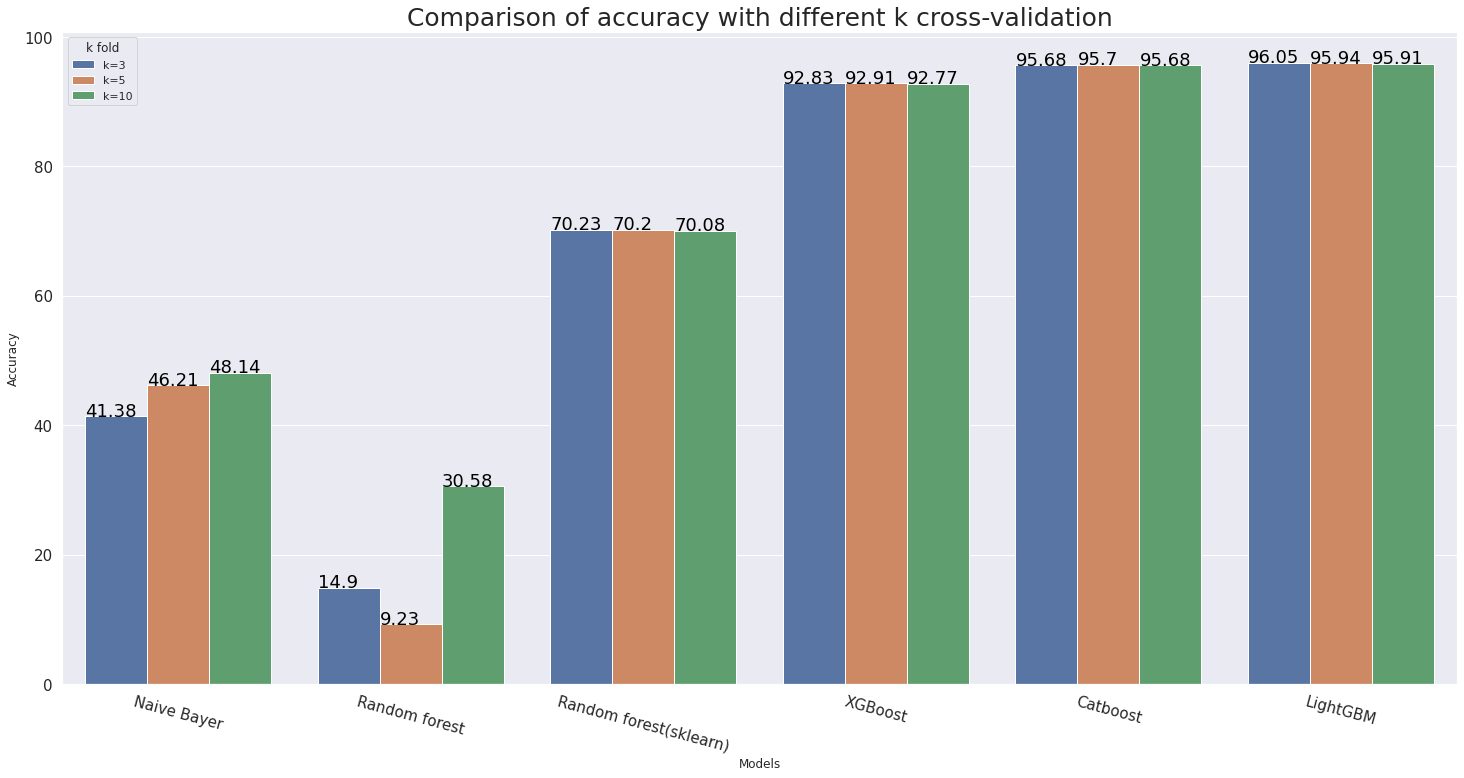

In [218]:
kfold_df = pd.DataFrame([
    ['Naive Bayer', 'k=3', nb_kv3[0]],
    ['Naive Bayer', 'k=5', nb_kv5[0]],
    ['Naive Bayer', 'k=10', nb_kv10[0]],
    ['Random forest', 'k=3', rfc_s_kv3[0]],
    ['Random forest', 'k=5', rfc_s_kv5[0]],
    ['Random forest', 'k=10', rfc_s_kv10[0]],
    ['Random forest(sklearn)', 'k=3', rfc_result_3[0]],
    ['Random forest(sklearn)', 'k=5', rfc_result_5[0]],
    ['Random forest(sklearn)', 'k=10', rfc_result_10[0]],
    ['XGBoost', 'k=3', xgb_result_3[0]],
    ['XGBoost', 'k=5', xgb_result_5[0]],
    ['XGBoost', 'k=10', xgb_result_10[0]],
    ['Catboost', 'k=3', cbc_result_3[0]],
    ['Catboost', 'k=5', cbc_result_5[0]],
    ['Catboost', 'k=10', cbc_result_10[0]],
    ['LightGBM', 'k=3', lgbm_result_3[0]],
    ['LightGBM', 'k=5', lgbm_result_5[0]],
    ['LightGBM', 'k=10', lgbm_result_10[0]]], columns=['Models', 'k fold', 'Accuracy'])
plt.xticks(rotation=-15,size=15)
plt.yticks(size=15)
sns.set(rc = {'figure.figsize':(25,12)})
kf_acc_plot = sns.barplot(x='Models', y='Accuracy', hue='k fold', data=kfold_df)
kf_acc_plot.set_title('Comparison of accuracy with different k cross-validation',size=25)
for p in kf_acc_plot.patches:
    kf_acc_plot.annotate(f'\n{round(p.get_height(),2)}', (p.get_x(), p.get_height()), color='black', size=18)

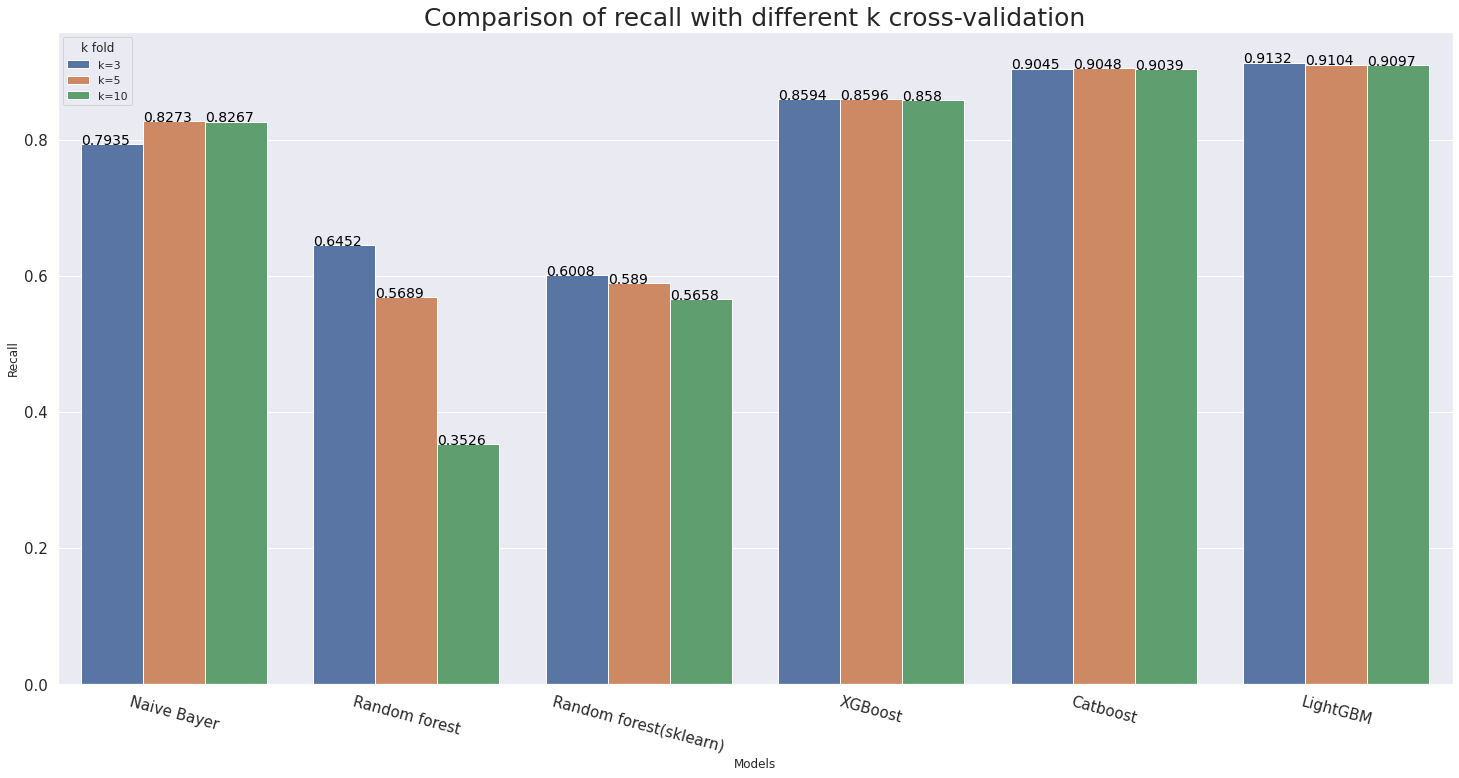

In [240]:
kfold_rec_df = pd.DataFrame([
    ['Naive Bayer', 'k=3', nb_kv3[2]],
    ['Naive Bayer', 'k=5', nb_kv5[2]],
    ['Naive Bayer', 'k=10', nb_kv10[2]],
    ['Random forest', 'k=3', rfc_s_kv3[2]],
    ['Random forest', 'k=5', rfc_s_kv5[2]],
    ['Random forest', 'k=10', rfc_s_kv10[2]],
    ['Random forest(sklearn)', 'k=3', rfc_result_3[2]],
    ['Random forest(sklearn)', 'k=5', rfc_result_5[2]],
    ['Random forest(sklearn)', 'k=10', rfc_result_10[2]],
    ['XGBoost', 'k=3', xgb_result_3[2]],
    ['XGBoost', 'k=5', xgb_result_5[2]],
    ['XGBoost', 'k=10', xgb_result_10[2]],
    ['Catboost', 'k=3', cbc_result_3[2]],
    ['Catboost', 'k=5', cbc_result_5[2]],
    ['Catboost', 'k=10', cbc_result_10[2]],
    ['LightGBM', 'k=3', lgbm_result_3[2]],
    ['LightGBM', 'k=5', lgbm_result_5[2]],
    ['LightGBM', 'k=10', lgbm_result_10[2]]], columns=['Models', 'k fold', 'Recall'])
plt.xticks(rotation=-15,size=15)
plt.yticks(size=15)
sns.set(rc = {'figure.figsize':(25,12)})
kf_rec_plot = sns.barplot(x='Models', y='Recall', hue='k fold', data=kfold_rec_df)
kf_rec_plot.set_title('Comparison of recall with different k cross-validation',size=25)
for p in kf_rec_plot.patches:
    kf_rec_plot.annotate(f'\n{round(p.get_height(),4)}', (p.get_x(), p.get_height()), color='black', size=14)

Conclusion - 5 fold cross-validation and model accuracy

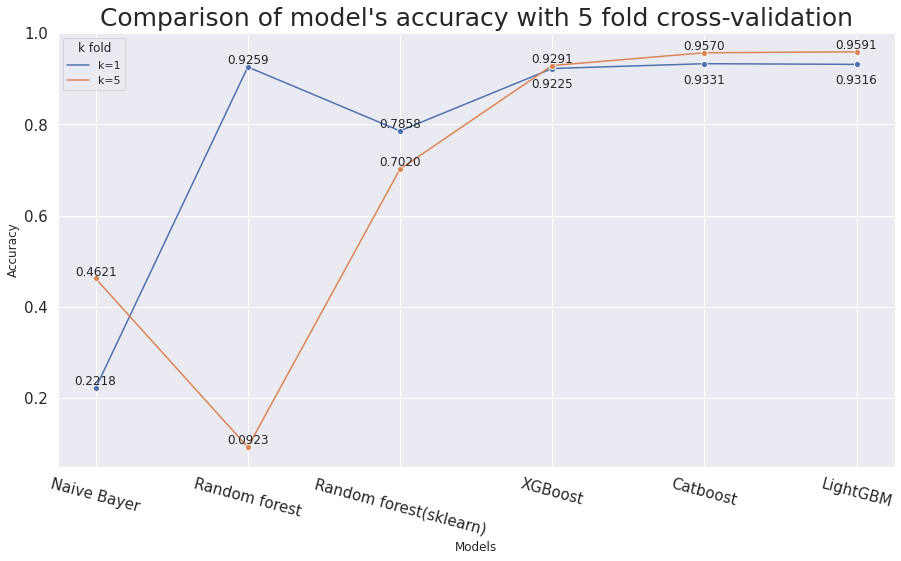

In [237]:
perform_df = pd.DataFrame([
    ['Naive Bayer', 'k=1', test_accuracy_nb],
    ['Naive Bayer', 'k=5', nb_kv5[0]*0.01],
    ['Random forest', 'k=1', test_accuracy_rfc_s],
    ['Random forest', 'k=5', rfc_s_kv5[0]*0.01],
    ['Random forest(sklearn)', 'k=1', test_accuracy_rfc],
    ['Random forest(sklearn)', 'k=5', rfc_result_5[0]*0.01],
    ['XGBoost', 'k=1', test_accuracy_xgb],
    ['XGBoost', 'k=5', xgb_result_5[0]*0.01],
    ['Catboost', 'k=1', test_accuracy_cbc],
    ['Catboost', 'k=5', cbc_result_5[0]*0.01],
    ['LightGBM', 'k=1', test_accuracy_lgbm],
    ['LightGBM', 'k=5', lgbm_result_10[0]*0.01]], columns=['Models', 'k fold', 'Accuracy'])

plt.xticks(rotation=-15,size=15)
plt.yticks(size=15)
sns.set(rc = {'figure.figsize':(15,8)})
model_perform_plot = sns.lineplot(x='Models', y='Accuracy', hue='k fold',marker='o', data=perform_df)
model_perform_plot.set_title("Comparison of model's accuracy with 5 fold cross-validation",size=25)
for a,b in zip(perform_df['Models'],perform_df['Accuracy']):
  if b not in [test_accuracy_xgb , test_accuracy_cbc , test_accuracy_lgbm]:
    plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=12)
  else:
    plt.text(a, b-0.05, '%.4f' % b, ha='center', va= 'bottom',fontsize=12)

# AUC

**Conclusion**

In [94]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [133]:
def AUC(model_name,test_data_y,test_pred_y):  
  auc = roc_auc_score(test_data_y,test_pred_y)
  print("AUC of {} : ".format(model_name),auc)
  return auc

In [134]:
nb_auc = AUC('Naive Bayer',y_test,y_test_nb)
rfc_s_auc = AUC('Random Forest ',y_test,y_test_rfc_s)
rfc_auc = AUC('Random Forest sklearn',y_test,y_test_rfc)
xgb_auc = AUC('XGBoost',y_test,y_test_xgb)
cbc_auc = AUC('Catboost',y_test,y_test_cbc)
lgbm_auc = AUC('Light GBM',y_test,y_test_lgbm)

AUC of Naive Bayer :  0.5203886524000991
AUC of Random Forest  :  0.503723947738561
AUC of Random Forest sklearn :  0.566503603224633
AUC of XGBoost :  0.5047725619738959
AUC of Catboost :  0.5019005584938391
AUC of Light GBM :  0.5031407406068894


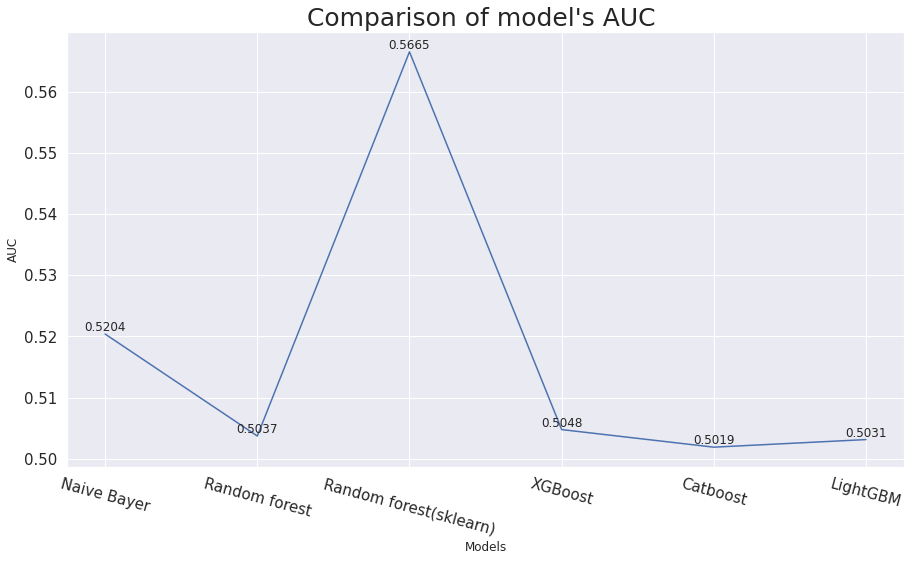

In [236]:
auc_df = pd.DataFrame([
    ['Naive Bayer', nb_auc],
    ['Random forest',rfc_s_auc],
    ['Random forest(sklearn)',rfc_auc],
    ['XGBoost',xgb_auc],
    ['Catboost',cbc_auc],
    ['LightGBM',lgbm_auc]], columns=['Models','AUC'])
plt.xticks(rotation=-15,size=15)
plt.yticks(size=15)
sns.set(rc = {'figure.figsize':(15,8)})
auc_plot = sns.lineplot(x='Models', y='AUC', data=auc_df)
auc_plot.set_title("Comparison of model's AUC ",size=25)
for a,b in zip(auc_df['Models'],auc_df['AUC']):
  plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=12)

# Recall

**1 fold recall**

In [232]:
def Recall(model_name,test_data_y,test_pred_y):  
  recall = metrics.recall_score(test_data_y,test_pred_y,average='micro')
  print("Recall of {} : ".format(model_name),recall)
  return recall

In [233]:
nb_rec = Recall('Naive Bayer',y_test,y_test_nb)
rfc_s_rec = Recall('Random Forest ',y_test,y_test_rfc_s)
rfc_rec = Recall('Random Forest sklearn',y_test,y_test_rfc)
xgb_rec = Recall('XGBoost',y_test,y_test_xgb)
cbc_rec = Recall('Catboost',y_test,y_test_cbc)
lgbm_rec = Recall('Light GBM',y_test,y_test_lgbm)

Recall of Naive Bayer :  0.22175446580953465
Recall of Random Forest  :  0.9258732506542269
Recall of Random Forest sklearn :  0.7857549209238821
Recall of XGBoost :  0.9225167823415633
Recall of Catboost :  0.9330981909204688
Recall of Light GBM :  0.9316190692911595


Conclusion - 5 fold cross-validation and model recall

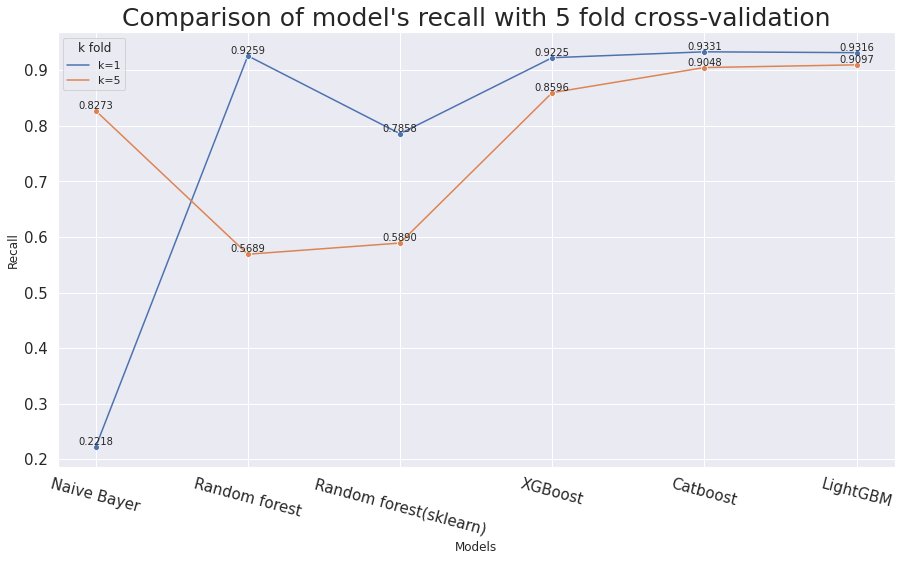

In [235]:
rec_perform_df = pd.DataFrame([
    ['Naive Bayer', 'k=1', nb_rec],
    ['Naive Bayer', 'k=5', nb_kv5[2]],
    ['Random forest', 'k=1', rfc_s_rec],
    ['Random forest', 'k=5', rfc_s_kv5[2]],
    ['Random forest(sklearn)', 'k=1', rfc_rec],
    ['Random forest(sklearn)', 'k=5', rfc_result_5[2]],
    ['XGBoost', 'k=1', xgb_rec],
    ['XGBoost', 'k=5', xgb_result_5[2]],
    ['Catboost', 'k=1', cbc_rec],
    ['Catboost', 'k=5', cbc_result_5[2]],
    ['LightGBM', 'k=1', lgbm_rec],
    ['LightGBM', 'k=5', lgbm_result_10[2]]], columns=['Models', 'k fold', 'Recall'])

plt.xticks(rotation=-15,size=15)
plt.yticks(size=15)
sns.set(rc = {'figure.figsize':(15,8)})
model_rec_perform_plot = sns.lineplot(x='Models', y='Recall', hue='k fold',marker='o', data=rec_perform_df)
model_rec_perform_plot.set_title("Comparison of model's recall with 5 fold cross-validation",size=25)
for a,b in zip(rec_perform_df['Models'],rec_perform_df['Recall']):
  plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=10)